In [3]:
import cv2 as cv
import numpy as np
import math as m
from matplotlib import pyplot as plt
import os
import sys

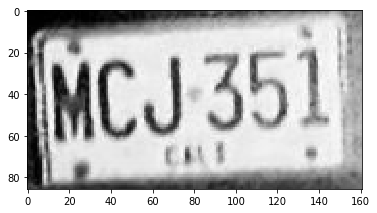

In [19]:
img=cv.imread("../blanks/blank (1).jpg")
imgray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(imgray,cmap='gray')

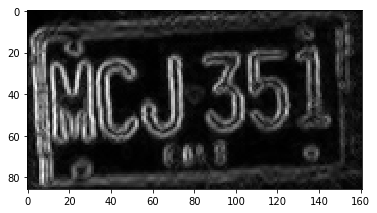

In [20]:
imgray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3, 3));
gradiente=cv.morphologyEx(imgray, cv.MORPH_GRADIENT, kernel);
plt.imshow(gradiente,cmap='gray')

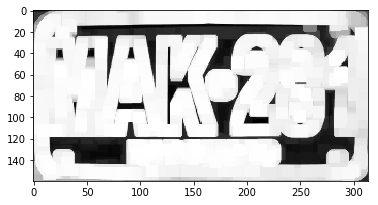

In [7]:
kernel1 = cv.getStructuringElement(cv.MORPH_RECT,(11, 11));
dilate=cv.dilate(gradiente,kernel1);
plt.imshow(dilate,cmap='gray')

In [8]:
I=gradiente;
II=I;
#cv.imshow('',II)
#cv.waitKey(0);

#Binarización inicial de la imagen
[fil,col]=I.shape
for i in range(0,fil):
    for j in range(0,col):
        if I[i,j]<25:
            I[i,j]=0;
            
for i in range(0,fil):
    for j in range(0,col):
        if I[i,j]>0:
            I[i,j]=1;

(160, 314)


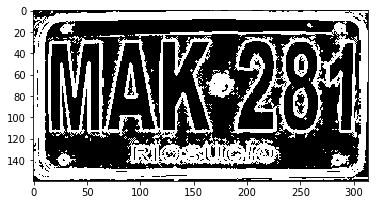

In [9]:
print I.shape
plt.imshow(I,cmap='gray')

In [10]:
#Transformaciones morfologicas
se=np.ones((50,50),np.uint8);
se2=np.ones((10,10),np.uint8);
closing=cv.morphologyEx(I,cv.MORPH_CLOSE,se)
dilataion=cv.dilate(closing,se2,1)

#Encontrar contornos 
S,contours,hierarchy=cv.findContours(dilataion,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE);
cnt=contours[:];
num=len(cnt);
box=np.zeros((num,4));

for j in range(num):
    box[j,:]=cv.boundingRect(cnt[j]);

L=np.zeros((num,4));
Max=[0,0];

for j in range(0,num):
    L[j,:]=box[j];
    if L[j,2]>Max[0]:
        Max=[j,L[j,2]];

BOX=box[Max[0],:];
#Mascara
b=img[int(BOX[1]):int(BOX[1]+BOX[2]),int(BOX[0]):int(BOX[0]+BOX[2]),:];
directorio2="../blanks/blank (%d).jpg" %(1);
cv.imwrite(directorio2,b);

(160, 314)


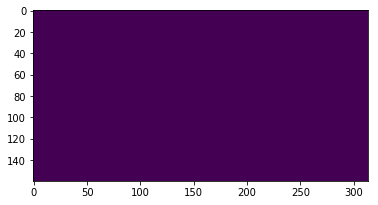

In [11]:
print dilataion.shape
plt.imshow(dilataion)

(160, 314)


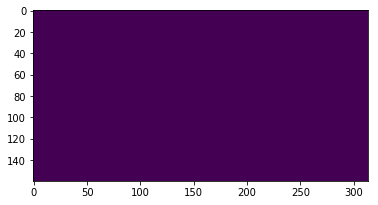

In [12]:
print closing.shape
plt.imshow(closing)

In [13]:
#Segmentación
directorio3="../blanks/blank (%d).jpg" %(1);
A=cv.imread(directorio3);
[fil,col,cap]=A.shape
rgB=A[:,:,0];
rGb=A[:,:,1];
Rgb=A[:,:,2];
#Nomrmalización
R=Rgb/255.0;
G=rGb/255.0;
B=rgB/255.0;
#construcción de espacio k de color
K=np.zeros((fil,col));
for i in range(0,fil):
    for j in range(0,col):        
        MAX=max(R[i,j],G[i,j],B[i,j]);
        K[i,j]=1-MAX;

cv.imwrite("./prueba.bmp",K);
k=cv.imread("./prueba.bmp");
BW1=cv.Laplacian(k,cv.CV_8UC1);
Image=BW1[:,:,0]+BW1[:,:,1]+BW1[:,:,2]

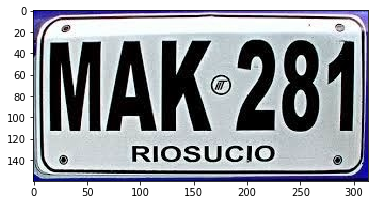

In [14]:
plt.imshow(A)

In [15]:
#Se calcula boundingRect para encontrar los caracteres de interes
ret,thresh=cv.threshold(Image,0,255,0);
S,contours,hierarchy=cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE);
cnt=contours[:];
num=len(cnt);
box=np.zeros((num,4));
for j in range(0,num):
    box[j,:]=cv.boundingRect(cnt[j]);
    
Box=np.zeros((20,4));
[L,A]=thresh.shape;
q=0;
for j in range(0,num):
    p=box[j,:]
    if p[3]>=0.4*L and p[3]<=0.7*L and p[2]>=0.08*A and p[2]<=0.17*A:
        Box[q]=p;
        q=q+1;

BOX=np.zeros((6,4));
num=len(Box)
#Se procee a encntrar dobles
q=0;
for j in range(0,num):
    if j%2==0 and j<11:
        BOX[q]=Box[j];
        q=q+1;

In [16]:
BOX

array([[ 15.,  29.,  50.,  85.],
       [275.,  28.,  27.,  86.],
       [120.,  28.,  49.,  86.],
       [ 67.,  28.,  50.,  86.],
       [232.,  27.,  37.,  88.],
       [189.,  27.,  39.,  87.]])

In [17]:
BOX=BOX.astype(int)
LETRA3=BW1[BOX[0,1]:BOX[0,1]+BOX[0,3],BOX[0,0]:BOX[0,0]+BOX[0,2]];
LETRA1=BW1[BOX[1,1]:BOX[1,1]+BOX[1,3],BOX[1,0]:BOX[1,0]+BOX[1,2]];
NUM1=BW1[BOX[2,1]:BOX[2,1]+BOX[2,3],BOX[2,0]:BOX[2,0]+BOX[2,2]];
NUM2=BW1[BOX[3,1]:BOX[3,1]+BOX[3,3],BOX[3,0]:BOX[3,0]+BOX[3,2]];
LETRA2=BW1[BOX[4,1]:BOX[4,1]+BOX[4,3],BOX[4,0]:BOX[4,0]+BOX[4,2]];
NUM3=BW1[BOX[5,1]:BOX[5,1]+BOX[5,3],BOX[5,0]:BOX[5,0]+BOX[5,2]];

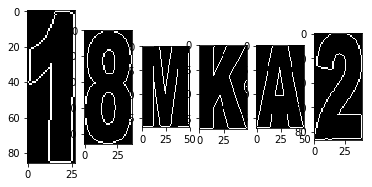

In [18]:
plt.subplot(161),plt.imshow(LETRA1*255);
plt.subplot(162),plt.imshow(LETRA2*255);
plt.subplot(163),plt.imshow(LETRA3*255);
plt.subplot(164),plt.imshow(NUM1*255);
plt.subplot(165),plt.imshow(NUM2*255);
plt.subplot(166),plt.imshow(NUM3*255);